In [1]:
import json
import string
import regex
from typing import List
import matplotlib.pyplot as plt

In [2]:
def normalize_answer(s: str) -> str:
    """Normalization from the SQuAD evaluation script.

    See https://worksheets.codalab.org/rest/bundles/0x6b567e1cf2e041ec80d7098f031c5c9e/contents/blob/
    """
    def remove_articles(text):
        return regex.sub(r"\b(a|an|the)\b", " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))


def is_correct(prediction: str, ground_truths: List[str]) -> float:
    normalized_prediction = normalize_answer(prediction)

    for ground_truth in ground_truths:
        normalized_ground_truth = normalize_answer(ground_truth)
        if normalized_ground_truth.lower() in normalized_prediction.lower():
            return 1.0
    return 0.0

In [3]:
def evaluate_qa_responses(inp : str):
    correct_count, total_count = 0, 0
    with open(inp) as fin:
        for line in fin:
            input_res = json.loads(line)
            total_count += 1
            
            correct_answers = input_res["correct_answer"]
            model_answer = input_res["model_answer"]       
            correct_count += is_correct(model_answer, correct_answers)
            
    return correct_count / total_count

## Gemini Pro

In [4]:
print("Accuracies for qa task closedbook =")
print(evaluate_qa_responses("./responses/gemini_qa/gemini_closedbook_responses.jsonl"))
print("Accuracies for qa task oracle =")
print(evaluate_qa_responses("./responses/gemini_qa/gemini_oracle_responses.jsonl"))
print("Accuracies for qa task (QAC) oracle =")
print(evaluate_qa_responses("./responses/gemini_qa/gemini_oracle_QAC_responses.jsonl"))

Accuracies for qa task closedbook =
0.43615819209039547
Accuracies for qa task oracle =
0.7156308851224106
Accuracies for qa task (QAC) oracle =
0.7830508474576271


In [5]:
input_paths = ["./responses/gemini_qa/gemini_10_doc_at_0_responses.jsonl",
               "./responses/gemini_qa/gemini_10_doc_at_4_responses.jsonl",
               "./responses/gemini_qa/gemini_10_doc_at_9_responses.jsonl"]

loc = [0, 4, 9]

In [6]:
print("Accuracies for qa task with number of documents = 10 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 10 and -
relevant document located at 0 is = 0.6263653483992467
relevant document located at 4 is = 0.5721280602636535
relevant document located at 9 is = 0.6598870056497175


In [7]:
input_paths = ["./responses/gemini_qa/gemini_10_doc_at_0_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_10_doc_at_4_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_10_doc_at_9_QAC_responses.jsonl"]

loc = [0, 4, 9]

In [8]:
print("Accuracies for qa task (QAC) with number of documents = 10 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 10 and -
relevant document located at 0 is = 0.6738229755178907
relevant document located at 4 is = 0.6497175141242938
relevant document located at 9 is = 0.6922787193973635


In [9]:
input_paths = ["./responses/gemini_qa/gemini_20_doc_at_0_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_4_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_9_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_14_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_19_responses.jsonl"]

loc = [0, 4, 9, 14, 19]

In [10]:
print("Accuracies for qa task with number of documents = 20 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 20 and -
relevant document located at 0 is = 0.5856873822975518
relevant document located at 4 is = 0.5318267419962335
relevant document located at 9 is = 0.5480225988700564
relevant document located at 14 is = 0.5555555555555556
relevant document located at 19 is = 0.6444444444444445


In [11]:
input_paths = ["./responses/gemini_qa/gemini_20_doc_at_0_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_4_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_9_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_14_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_20_doc_at_19_QAC_responses.jsonl"]

loc = [0, 4, 9, 14, 19]

In [12]:
print("Accuracies for qa task (QAC) with number of documents = 20 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 20 and -
relevant document located at 0 is = 0.632768361581921
relevant document located at 4 is = 0.599623352165725
relevant document located at 9 is = 0.6203389830508474
relevant document located at 14 is = 0.6222222222222222
relevant document located at 19 is = 0.6734463276836158


In [13]:
input_paths = ["./responses/gemini_qa/gemini_30_doc_at_0_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_4_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_9_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_14_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_19_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_24_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_29_responses.jsonl"]

loc = [0, 4, 9, 14, 19, 24, 29]

In [14]:
print("Accuracies for qa task with number of documents = 30 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 30 and -
relevant document located at 0 is = 0.5792843691148776
relevant document located at 4 is = 0.4463276836158192
relevant document located at 9 is = 0.45649717514124294
relevant document located at 14 is = 0.4873822975517891
relevant document located at 19 is = 0.5133709981167608
relevant document located at 24 is = 0.5099811676082863
relevant document located at 29 is = 0.6376647834274953


In [15]:
input_paths = ["./responses/gemini_qa/gemini_30_doc_at_0_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_4_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_9_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_14_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_19_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_24_QAC_responses.jsonl",
               "./responses/gemini_qa/gemini_30_doc_at_29_QAC_responses.jsonl"]

loc = [0, 4, 9, 14, 19, 24, 29]

In [16]:
print("Accuracies for qa task (QAC) with number of documents = 30 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 30 and -
relevant document located at 0 is = 0.6369114877589453
relevant document located at 4 is = 0.5408662900188324
relevant document located at 9 is = 0.543879472693032
relevant document located at 14 is = 0.5698681732580038
relevant document located at 19 is = 0.5947269303201507
relevant document located at 24 is = 0.6015065913370998
relevant document located at 29 is = 0.6696798493408663


## RWKV - Accuracy vs Size

In [22]:
accuracy = []
def evaluate_qa_responses(inp : str):
    correct_count, total_count = 0, 0
    with open(inp) as fin:
        for line in fin:
            input_res = json.loads(line)
            total_count += 1
            
            correct_answers = input_res["correct_answer"]
            model_answer = input_res["model_answer"]       
            correct_count += is_correct(model_answer, correct_answers)
            
    return correct_count / total_count

In [18]:
input_paths = [
    "./responses/rwkv_accuracy_vs_size/raven_3b_20_doc_at_0_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_3b_20_doc_at_4_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_3b_20_doc_at_9_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_3b_20_doc_at_14_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_3b_20_doc_at_19_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_7b_20_doc_at_0_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_7b_20_doc_at_4_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_7b_20_doc_at_9_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_7b_20_doc_at_14_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_7b_20_doc_at_19_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_14b_20_doc_at_0_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_14b_20_doc_at_4_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_14b_20_doc_at_9_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_14b_20_doc_at_14_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/raven_14b_20_doc_at_19_responses.jsonl",
]

In [19]:
for i in range(len(input_paths)):
    accuracy.append(evaluate_qa_responses(input_paths[i]))
    print("Accuracy is =", accuracy[-1])

Accuracy is = 0.19171374764595103
Accuracy is = 0.1856873822975518
Accuracy is = 0.1928436911487759
Accuracy is = 0.22259887005649717
Accuracy is = 0.4177024482109228
Accuracy is = 0.23691148775894538
Accuracy is = 0.24143126177024482
Accuracy is = 0.24444444444444444
Accuracy is = 0.271939736346516
Accuracy is = 0.3951035781544256
Accuracy is = 0.32354048964218457
Accuracy is = 0.3103578154425612
Accuracy is = 0.3009416195856874
Accuracy is = 0.3152542372881356
Accuracy is = 0.4335216572504708


In [20]:
input_paths = [
    "./responses/rwkv_accuracy_vs_size/pile_3b_20_doc_at_0_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_3b_20_doc_at_4_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_3b_20_doc_at_9_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_3b_20_doc_at_14_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_3b_20_doc_at_19_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_7b_20_doc_at_0_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_7b_20_doc_at_4_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_7b_20_doc_at_9_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_7b_20_doc_at_14_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_7b_20_doc_at_19_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_14b_20_doc_at_0_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_14b_20_doc_at_4_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_14b_20_doc_at_9_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_14b_20_doc_at_14_responses.jsonl",
    "./responses/rwkv_accuracy_vs_size/pile_14b_20_doc_at_19_responses.jsonl",
]

In [21]:
for i in range(len(input_paths)):
    accuracy.append(evaluate_qa_responses(input_paths[i]))
    print("Accuracy is =", accuracy[-1])

Accuracy is = 0.1096045197740113
Accuracy is = 0.11035781544256121
Accuracy is = 0.11563088512241054
Accuracy is = 0.13258003766478343
Accuracy is = 0.3273069679849341
Accuracy is = 0.17702448210922786
Accuracy is = 0.1800376647834275
Accuracy is = 0.18794726930320152
Accuracy is = 0.21393596986817326
Accuracy is = 0.41318267419962335
Accuracy is = 0.20979284369114878
Accuracy is = 0.21657250470809794
Accuracy is = 0.21619585687382298
Accuracy is = 0.23615819209039549
Accuracy is = 0.37325800376647833


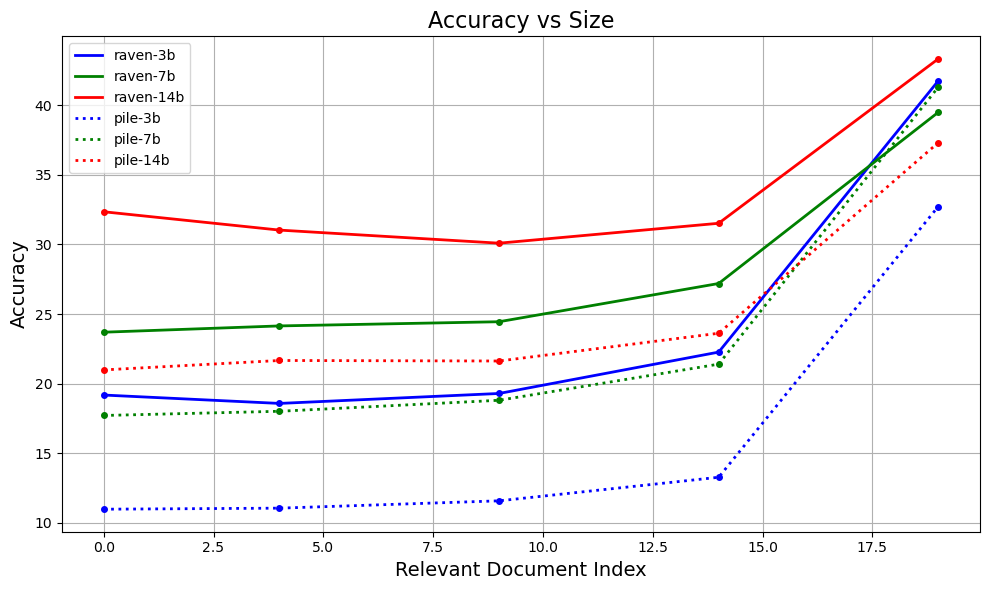

In [22]:
x = [0, 4, 9, 14, 19]
yy = []
for i in range(len(accuracy) // len(x)):
    y = []
    for j in range(len(x)):
        y.append(accuracy[len(x)*i + j]*100)
    yy.append(y)
    
f, ax = plt.subplots(1, 1, facecolor='w', figsize=(10, 6))
ax.grid()

ax.set_ylabel("Accuracy", fontsize=14)
ax.set_xlabel("Relevant Document Index", fontsize=14)

ax.plot(x, yy[0], linewidth = 2.0, color = "b", label="raven-3b")
ax.plot(x, yy[0], "bo", markersize = 4.0)

ax.plot(x, yy[1], linewidth = 2.0, color = "g", label="raven-7b")
ax.plot(x, yy[1], "go", markersize = 4.0)

ax.plot(x, yy[2], linewidth = 2.0, color = "r", label="raven-14b")
ax.plot(x, yy[2], "ro", markersize = 4.0)

ax.plot(x, yy[3], linewidth = 2.0, color = "b", label="pile-3b", linestyle=":")
ax.plot(x, yy[3], "bo", markersize = 4.0)

ax.plot(x, yy[4], linewidth = 2.0, color = "g", label="pile-7b", linestyle=":")
ax.plot(x, yy[4], "go", markersize = 4.0)

ax.plot(x, yy[5], linewidth = 2.0, color = "r", label="pile-14b", linestyle=":")
ax.plot(x, yy[5], "ro", markersize = 4.0)

ax.set_title("Accuracy vs Size", fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()

## RWKV - Raven 14b QA Task Accuracy

In [23]:
input_paths = [
    "raven_14b_closedbook_responses",
    "raven_14b_oracle_responses",
    "raven_14b_oracle_QAC_responses",
    "raven_14b_10_doc_at_0_responses",
    "raven_14b_10_doc_at_4_responses",
    "raven_14b_10_doc_at_9_responses",
    "raven_14b_10_doc_at_0_QAC_responses",
    "raven_14b_10_doc_at_4_QAC_responses",
    "raven_14b_10_doc_at_9_QAC_responses",
    "raven_14b_20_doc_at_0_responses",
    "raven_14b_20_doc_at_4_responses",
    "raven_14b_20_doc_at_9_responses",
    "raven_14b_20_doc_at_14_responses",
    "raven_14b_20_doc_at_19_responses",
    "raven_14b_20_doc_at_0_QAC_responses",
    "raven_14b_20_doc_at_4_QAC_responses",
    "raven_14b_20_doc_at_9_QAC_responses",
    "raven_14b_20_doc_at_14_QAC_responses",
    "raven_14b_20_doc_at_19_QAC_responses",
    "raven_14b_30_doc_at_0_responses",
    "raven_14b_30_doc_at_4_responses",
    "raven_14b_30_doc_at_9_responses",
    "raven_14b_30_doc_at_14_responses",
    "raven_14b_30_doc_at_19_responses",
    "raven_14b_30_doc_at_24_responses",
    "raven_14b_30_doc_at_29_responses",
    "raven_14b_30_doc_at_0_QAC_responses",
    "raven_14b_30_doc_at_4_QAC_responses",
    "raven_14b_30_doc_at_9_QAC_responses",
    "raven_14b_30_doc_at_14_QAC_responses",
    "raven_14b_30_doc_at_19_QAC_responses",
    "raven_14b_30_doc_at_24_QAC_responses",
    "raven_14b_30_doc_at_29_QAC_responses",
]

In [24]:
for i in range(len(input_paths)):
    print("Accuracy for", input_paths[i], "is =", evaluate_qa_responses("./responses/rwkv_raven_14b_qa/"+input_paths[i]+".jsonl"))

Accuracy for raven_14b_closedbook_responses is = 0.30772128060263654
Accuracy for raven_14b_oracle_responses is = 0.8056497175141243
Accuracy for raven_14b_oracle_QAC_responses is = 0.7619585687382298
Accuracy for raven_14b_10_doc_at_0_responses is = 0.3845574387947269
Accuracy for raven_14b_10_doc_at_4_responses is = 0.3495291902071563
Accuracy for raven_14b_10_doc_at_9_responses is = 0.4384180790960452
Accuracy for raven_14b_10_doc_at_0_QAC_responses is = 0.38342749529190207
Accuracy for raven_14b_10_doc_at_4_QAC_responses is = 0.335969868173258
Accuracy for raven_14b_10_doc_at_9_QAC_responses is = 0.40941619585687383
Accuracy for raven_14b_20_doc_at_0_responses is = 0.32354048964218457
Accuracy for raven_14b_20_doc_at_4_responses is = 0.3103578154425612
Accuracy for raven_14b_20_doc_at_9_responses is = 0.3009416195856874
Accuracy for raven_14b_20_doc_at_14_responses is = 0.3152542372881356
Accuracy for raven_14b_20_doc_at_19_responses is = 0.4335216572504708
Accuracy for raven_14b_2

## LLaMA2

In [ ]:
print("Accuracies for qa task closedbook =")
print(evaluate_qa_responses("./responses/llama2_qa/llama2_closedbook_responses.jsonl"))
print("Accuracies for qa task oracle =")
print(evaluate_qa_responses("./responses/llama2_qa/llama2_oracle_responses.jsonl"))
print("Accuracies for qa task (QAC) oracle =")
print(evaluate_qa_responses("./responses/llama2_qa/llama2_oracle_QAC_responses.jsonl"))

Accuracies for qa task closedbook =
0.5133709981167608
Accuracies for qa task oracle =
0.9024482109227872
Accuracies for qa task (QAC) oracle =
0.8952919020715631


In [ ]:
input_paths = ["./responses/llama2_qa/llama2_10_doc_at_0_responses.jsonl",
               "./responses/llama2_qa/llama2_10_doc_at_4_responses.jsonl",
               "./responses/llama2_qa/llama2_10_doc_at_9_responses.jsonl"]

loc = [0, 4, 9]

In [ ]:
print("Accuracies for qa task with number of documents = 10 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 10 and -
relevant document located at 0 is = 0.7367231638418079
relevant document located at 4 is = 0.67866927592955
relevant document located at 9 is = 0.6986817325800376


In [ ]:
input_paths = ["./responses/llama2_qa/llama2_10_doc_at_0_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_10_doc_at_4_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_10_doc_at_9_QAC_responses.jsonl"]

loc = [0, 4, 9]

In [ ]:
print("Accuracies for qa task (QAC) with number of documents = 10 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 10 and -
relevant document located at 0 is = 0.7747645951035782
relevant document located at 4 is = 0.7050847457627119
relevant document located at 9 is = 0.6851224105461393


In [ ]:
input_paths = ["./responses/llama2_qa/llama2_20_doc_at_0_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_4_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_9_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_14_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_19_responses.jsonl"]

loc = [0, 4, 9, 14, 19]

In [ ]:
print("Accuracies for qa task with number of documents = 20 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 20 and -
relevant document located at 0 is = 0.6030131826741997
relevant document located at 4 is = 0.4440677966101695
relevant document located at 9 is = 0.45875706214689266
relevant document located at 14 is = 0.4862523540489642
relevant document located at 19 is = 0.27984934086629004


In [ ]:
input_paths = ["./responses/llama2_qa/llama2_20_doc_at_0_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_4_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_9_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_14_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_20_doc_at_19_QAC_responses.jsonl"]

loc = [0, 4, 9, 14, 19]

In [ ]:
print("Accuracies for qa task (QAC) with number of documents = 20 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 20 and -
relevant document located at 0 is = 0.7032015065913371
relevant document located at 4 is = 0.5666041275797373
relevant document located at 9 is = 0.5871939736346516
relevant document located at 14 is = 0.5416195856873823
relevant document located at 19 is = 0.35900339750849375


In [17]:
input_paths = ["./responses/llama2_qa/llama2_30_doc_at_0_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_4_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_9_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_14_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_19_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_24_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_29_responses.jsonl"]

loc = [0, 4, 9, 14, 19, 24, 29]

In [18]:
print("Accuracies for qa task with number of documents = 30 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 30 and -
relevant document located at 0 is = 0.6195856873822976
relevant document located at 4 is = 0.5156308851224105
relevant document located at 9 is = 0.5001883239171375
relevant document located at 14 is = 0.5096045197740113
relevant document located at 19 is = 0.25348399246704334
relevant document located at 24 is = 0.24331450094161958
relevant document located at 29 is = 0.2775894538606403


In [19]:
input_paths = ["./responses/llama2_qa/llama2_30_doc_at_0_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_4_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_9_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_14_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_19_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_24_QAC_responses.jsonl",
               "./responses/llama2_qa/llama2_30_doc_at_29_QAC_responses.jsonl"]

loc = [0, 4, 9, 14, 19, 24, 29]

In [20]:
print("Accuracies for qa task (QAC) with number of documents = 30 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 30 and -
relevant document located at 0 is = 0.7047080979284369
relevant document located at 4 is = 0.5917137476459511
relevant document located at 9 is = 0.5329566854990584
relevant document located at 14 is = 0.5672316384180791
relevant document located at 19 is = 0.3408662900188324
relevant document located at 24 is = 0.34689265536723163
relevant document located at 29 is = 0.3559322033898305


# Mistral 7B 

In [23]:
accuracy = []
def evaluate_qa_responses(inp : str):
    correct_count, total_count = 0, 0
    with open(inp) as fin:
        for line in fin:
            input_res = json.loads(line)
            total_count += 1
            
            correct_answers = input_res["correct_answer"]
            answer_index = input_res["model_answer"].find("Answer:") # the model returns context also, hence manually removed the context.
            model_answer = input_res["model_answer"][answer_index + len("Answer:"):].strip()

            correct_count += is_correct(model_answer, correct_answers)
            
    return correct_count / total_count

print("Accuracies for qa task closedbook =")
print(evaluate_qa_responses("./responses/mistral_qa/llama2_closedbook_responses.jsonl"))
print("Accuracies for qa task oracle =")
print(evaluate_qa_responses("./responses/llama2_qa/llama2_oracle_responses.jsonl"))
print("Accuracies for qa task (QAC) oracle =")
print(evaluate_qa_responses("./responses/llama2_qa/llama2_oracle_QAC_responses.jsonl"))

In [24]:
input_paths = ["./responses/mistral_qa/mist_7b_sdpa_10_doc_at_0_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_10_doc_at_4_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_10_doc_at_9_responses.jsonl"]

loc = [0, 4, 9]

In [25]:
print("Accuracies for qa task with number of documents = 10 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 10 and -
relevant document located at 0 is = 0.7160075329566855
relevant document located at 4 is = 0.688512241054614
relevant document located at 9 is = 0.6824858757062147


In [26]:
input_paths = ["./responses/mistral_qa/mist_7b_sdpa_10_doc_at_0_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_10_doc_at_4_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_10_doc_at_9_QAC_responses.jsonl"]

loc = [0, 4, 9]

In [27]:
print("Accuracies for qa task (QAC) with number of documents = 10 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 10 and -
relevant document located at 0 is = 0.7755178907721281
relevant document located at 4 is = 0.6764595103578155
relevant document located at 9 is = 0.6421845574387948


In [28]:
input_paths = ["./responses/mistral_qa/mist_7b_sdpa_20_doc_at_0_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_4_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_9_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_14_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_19_responses.jsonl"]

loc = [0, 4, 9, 14, 19]

In [29]:
print("Accuracies for qa task with number of documents = 20 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 20 and -
relevant document located at 0 is = 0.647834274952919
relevant document located at 4 is = 0.6500941619585687
relevant document located at 9 is = 0.6523540489642184
relevant document located at 14 is = 0.6568738229755179
relevant document located at 19 is = 0.6613935969868173


In [30]:
input_paths = ["./responses/mistral_qa/mist_7b_sdpa_20_doc_at_0_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_4_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_9_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_14_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_20_doc_at_19_QAC_responses.jsonl"]

loc = [0, 4, 9, 14, 19]

In [31]:
print("Accuracies for qa task (QAC) with number of documents = 20 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 20 and -
relevant document located at 0 is = 0.7404896421845575
relevant document located at 4 is = 0.631638418079096
relevant document located at 9 is = 0.6180790960451977
relevant document located at 14 is = 0.623352165725047
relevant document located at 19 is = 0.6135593220338983


In [32]:
input_paths = ["./responses/mistral_qa/mist_7b_base_sdpa_20_doc_at_0_responses.jsonl",
               "./responses/mistral_qa/mist_7b_base_sdpa_20_doc_at_4_responses.jsonl",
               "./responses/mistral_qa/mist_7b_base_sdpa_20_doc_at_9_responses.jsonl",
               "./responses/mistral_qa/mist_7b_base_sdpa_20_doc_at_14_responses.jsonl",
               "./responses/mistral_qa/mist_7b_base_sdpa_20_doc_at_19_responses.jsonl"]

loc = [0, 4, 9, 14, 19]

In [33]:
print("Accuracies for qa task (base model) with number of documents = 20 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (base model) with number of documents = 20 and -
relevant document located at 0 is = 0.6293785310734463
relevant document located at 4 is = 0.3559322033898305
relevant document located at 9 is = 0.33634651600753296
relevant document located at 14 is = 0.33973634651600754
relevant document located at 19 is = 0.43954802259887005


In [34]:
input_paths = ["./responses/mistral_qa/mist_7b_sdpa_30_doc_at_0_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_4_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_9_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_14_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_19_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_24_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_29_responses.jsonl",]

loc = [0, 4, 9, 14, 19, 24, 29]

In [35]:
print("Accuracies for qa task with number of documents = 30 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task with number of documents = 30 and -
relevant document located at 0 is = 0.6218455743879473
relevant document located at 4 is = 0.6015065913370998
relevant document located at 9 is = 0.6222222222222222
relevant document located at 14 is = 0.6418079096045197
relevant document located at 19 is = 0.6308851224105462
relevant document located at 24 is = 0.6425612052730697
relevant document located at 29 is = 0.6629001883239172


In [36]:
input_paths = ["./responses/mistral_qa/mist_7b_sdpa_30_doc_at_0_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_4_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_9_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_14_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_19_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_24_QAC_responses.jsonl",
               "./responses/mistral_qa/mist_7b_sdpa_30_doc_at_29_QAC_responses.jsonl",]

loc = [0, 4, 9, 14, 19, 24, 29]

In [37]:
print("Accuracies for qa task (QAC) with number of documents = 30 and -")
for i in range(len(input_paths)):
    print("relevant document located at", loc[i], "is =", evaluate_qa_responses(input_paths[i]))

Accuracies for qa task (QAC) with number of documents = 30 and -
relevant document located at 0 is = 0.7050847457627119
relevant document located at 4 is = 0.5992467043314501
relevant document located at 9 is = 0.5992467043314501
relevant document located at 14 is = 0.6169491525423729
relevant document located at 19 is = 0.6064030131826742
relevant document located at 24 is = 0.6180790960451977
relevant document located at 29 is = 0.6271186440677966
